In [65]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\nunez\\PycharmProjects\\pythonProject1'

In [2]:
#Obtenemos los datos de microsoft
msft = yf.Ticker("MSFT")

In [3]:
#me quedo con los ultimos 6 meses
hist = msft.history(period="6mo")

In [30]:
hist["year"] = hist.reset_index().Date.dt.year.to_list()
hist["month"] = hist.reset_index().Date.dt.month.to_list()
hist["day"] = hist.reset_index().Date.dt.day.to_list()

In [43]:
def setWeek(day:int):
    if day <= 8:
        return 1
    
    elif day <= 15:
        return 2
    
    elif day <=23:
        return 3
    
    else:
        return 4

In [44]:
hist["week"] = hist.day.apply(lambda x: setWeek(x))

In [70]:
monthly_hist = hist.groupby(["year", "month"]).mean().Close.reset_index()
weekly_hist = hist.groupby(["year", "month","week"]).mean().Close.reset_index()

In [94]:
def setWeeklyClose(row):
    if row.week == 1:
        if row.month == 1:
            condition = (weekly_hist.week == 4) & (weekly_hist.month == 12) & (weekly_hist.year == row.year-1)
        else:
            condition = (weekly_hist.week == 4) & (weekly_hist.month == row.month-1) & (weekly_hist.year == row.year)
    else:
        condition = (weekly_hist.week == row.week-1) & (weekly_hist.month == row.month) & (weekly_hist.year == row.year)
    
    filtered_rows = weekly_hist[condition]
    
    if not filtered_rows.empty:
        return filtered_rows.iloc[0]["Close"]
    else:
        return None

In [83]:
def printrow(x):
    print(pd.DataFrame(x))

In [95]:
hist["Close_week"] = hist.apply(setWeeklyClose,axis=1)

In [103]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,week,Close_week
Date,,,,,,,,,,,,
2023-02-13 00:00:00-05:00,266.388967,273.316425,265.901237,270.051758,44630900,0.00,0.0,2023,2,13,2,NaN
2023-02-14 00:00:00-05:00,271.395490,273.684727,268.021321,270.897827,37047900,0.00,0.0,2023,2,14,2,NaN
2023-02-15 00:00:00-05:00,267.734725,270.139472,265.599379,268.732544,28922400,0.68,0.0,2023,2,15,2,NaN
2023-02-16 00:00:00-05:00,263.444072,266.158140,261.328701,261.578156,29603600,0.00,0.0,2023,2,16,3,269.894043
2023-02-17 00:00:00-05:00,258.824217,259.522672,255.441597,257.497101,30000100,0.00,0.0,2023,2,17,3,269.894043
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07 00:00:00-04:00,328.369995,331.109985,327.519989,330.109985,17741500,0.00,0.0,2023,8,7,1,339.811666
2023-08-08 00:00:00-04:00,326.959991,328.750000,323.000000,326.049988,22327600,0.00,0.0,2023,8,8,1,339.811666
2023-08-09 00:00:00-04:00,326.470001,327.109985,321.049988,322.230011,22373300,0.00,0.0,2023,8,9,2,329.073329


In [35]:
#Calculo moving average y EMA
hist["Close_ma"] = hist.Close.rolling(10, center=False).mean()
hist["Close_ema"] = hist.Close.ewm(span = 10, adjust=False).mean()

In [62]:
# Calculo velocidad de moving average y apertura
hist["Close_mas_velocidad"] = hist.Close_ema/hist.Close_ma-1
hist["Close_ma_velocidad"] = hist.Close_ma/hist.Close-1
hist["Close_ema_velocidad"] = hist.Close_ema/hist.Close-1

C:\Users\nunez\AppData\Local\Temp\ipykernel_7920\2378424614.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,1,1)


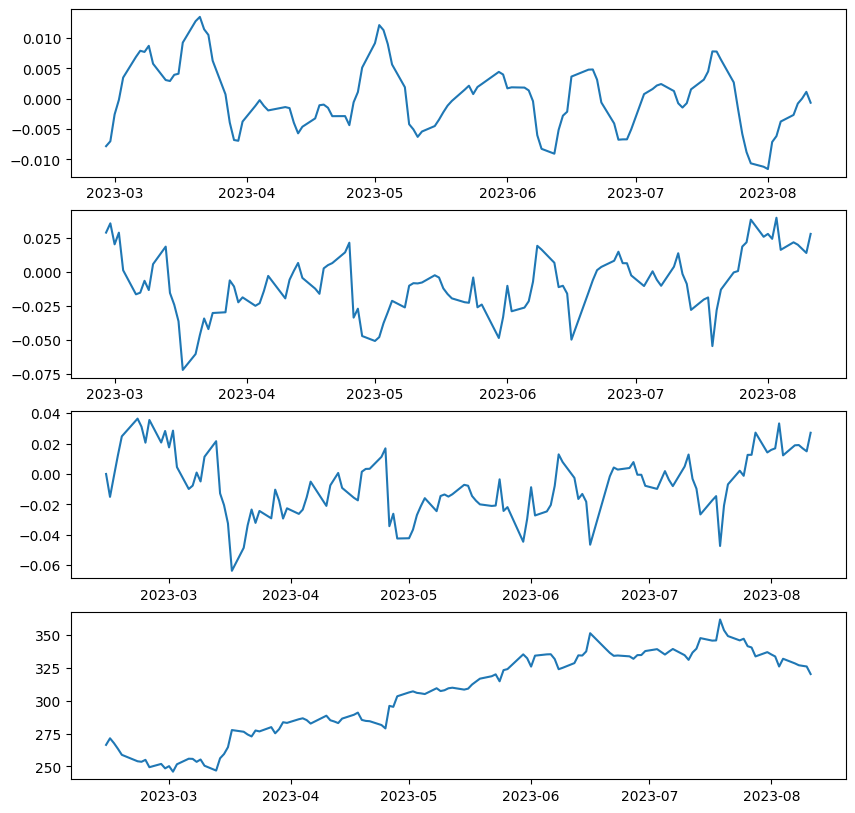

In [61]:
#Grafico los valores a traves del tiempo de la velocidad y precio de apertura
plt.subplots(figsize= (10,10))
plt.subplot(4,1,1)
plt.plot(hist.open_mas_velocidad)

plt.subplot(4,1,2)
plt.plot(hist.open_ma_velocidad)

plt.subplot(4,1,3)
plt.plot(hist.open_ema_velocidad)

plt.subplot(4,1,4)
plt.plot(hist.Open)